In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from skimage import io, filters, color, exposure, util
import numpy as np
import glob

In [8]:
fnames = [fn for fn in glob.glob("./*.jpg") if not fn.split('.')[1].endswith('mask')]

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


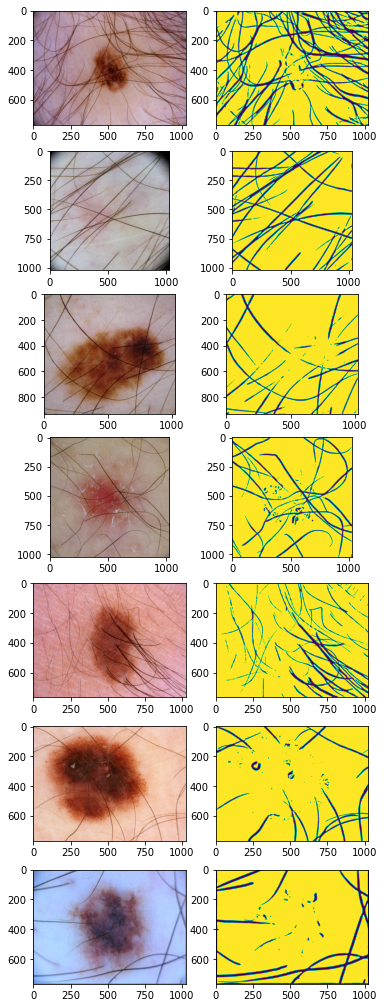

In [11]:
thresh = 0.03

fig, ax = plt.subplots(len(fnames), 2, figsize=(6,18))

for i, fn in enumerate(fnames):
    img = io.imread(fn)
    img_g = color.rgb2gray(img)

    frangi = filters.frangi(img_g, sigmas=range(1, 10, 2), scale_range=None, 
                            scale_step=None, alpha=0.5, beta=0.5, gamma=15, 
                            black_ridges=True, mode='reflect', cval=0)
    frangi /= frangi.max()

    frangi[frangi > thresh] = 1
    frangi[frangi < thresh] = 0
    
    frangi = util.invert(frangi)
    
    io.imsave(fn[:-4] + '_mask' + '.jpg', frangi)

    ax[i,0].imshow(img)
    ax[i,1].imshow(frangi)